# **Predictive Modelling Project**

## Problem statement

**Business Context**

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.
Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 billion dollars by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.
With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

**Objective**

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.


**Data Description**

The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

**Data Dictionary**

- visitors: Average number of visitors, in millions, to the platform in the past week
- ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
- major_sports_event: Any major sports event on the day
- genre: Genre of the content
- dayofweek: Day of the release of the content
- season: Season of the release of the content
- views_trailer: Number of views, in millions, of the content trailer
- views_content: Number of first-day views, in millions, of the content


## Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ottdata.csv")

## Data Overview

In [ ]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


### Checking the shape of the dataset

In [ ]:
print('There are',data.shape[0], 'rows and', data.shape[1], 'columns in the dataset')

There are 1000 rows and 8 columns in the dataset


### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


### Statistical summary of the dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


### Checking for missing values

In [ ]:
data.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

Different types of Univariate Analysis that can be done:
- Univariate Analysis of  Numerical Variable.
- Univariate Analysis of Categorical Variable.

### Univariate Analysis

In [ ]:
data.nunique()

visitors               56
ad_impressions         80
major_sports_event      2
genre                   8
dayofweek               7
season                  4
views_trailer         799
views_content          61
dtype: int64

**Numerical variables**
- visitors
- ad_impressions
- views_trailer
- views_content

**Categorical variables**
- major_sports_event
- genre
- dayofweek
- season

#### Numerical variable

In [ ]:
# function to create histogram and box plot for numerical variable

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="yellow", linestyle="-"
    )  # Add median to the histogram
    plt.xlabel(str(feature)+' in millions')
    plt.show()

##### Observation on Visitors

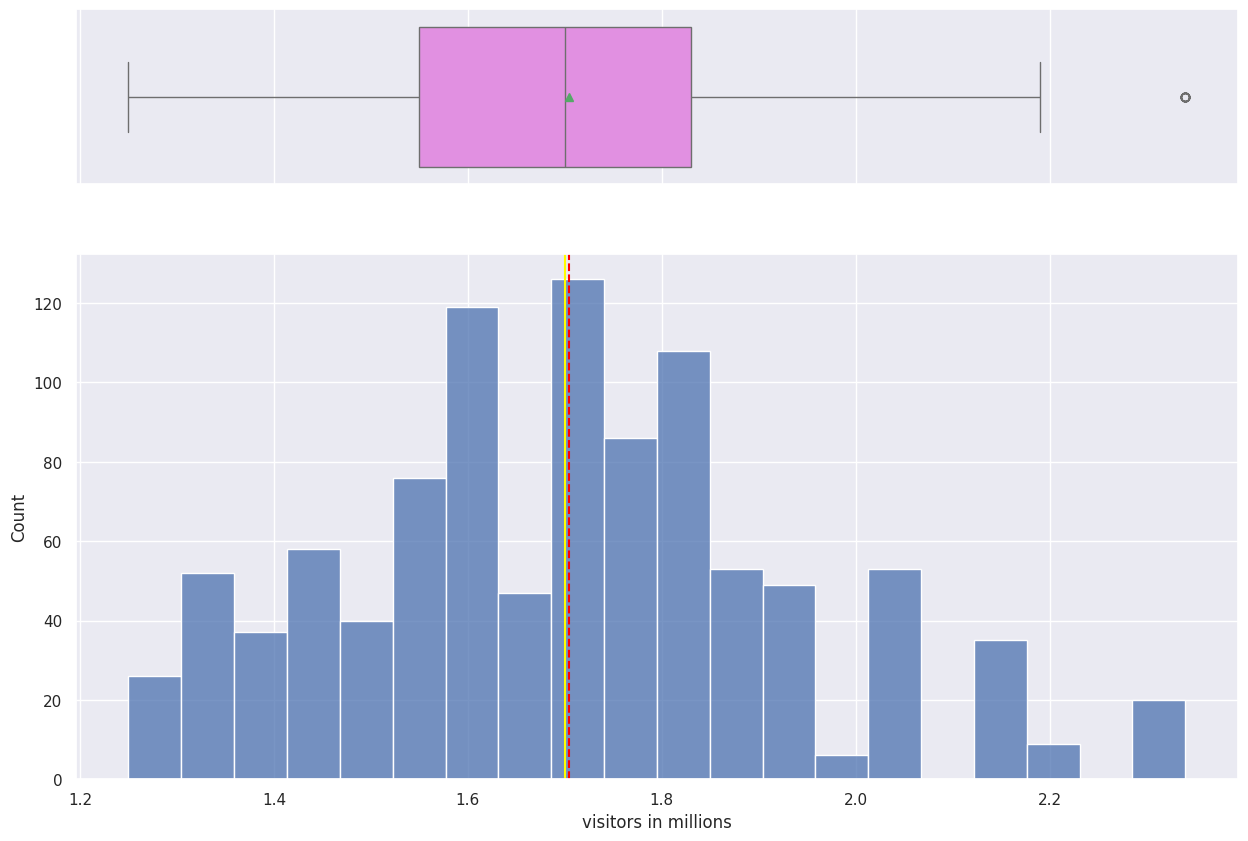

In [ ]:
histogram_boxplot(data, "visitors")

The vistors plot is normally distributed.

##### Observation on Ad impressions

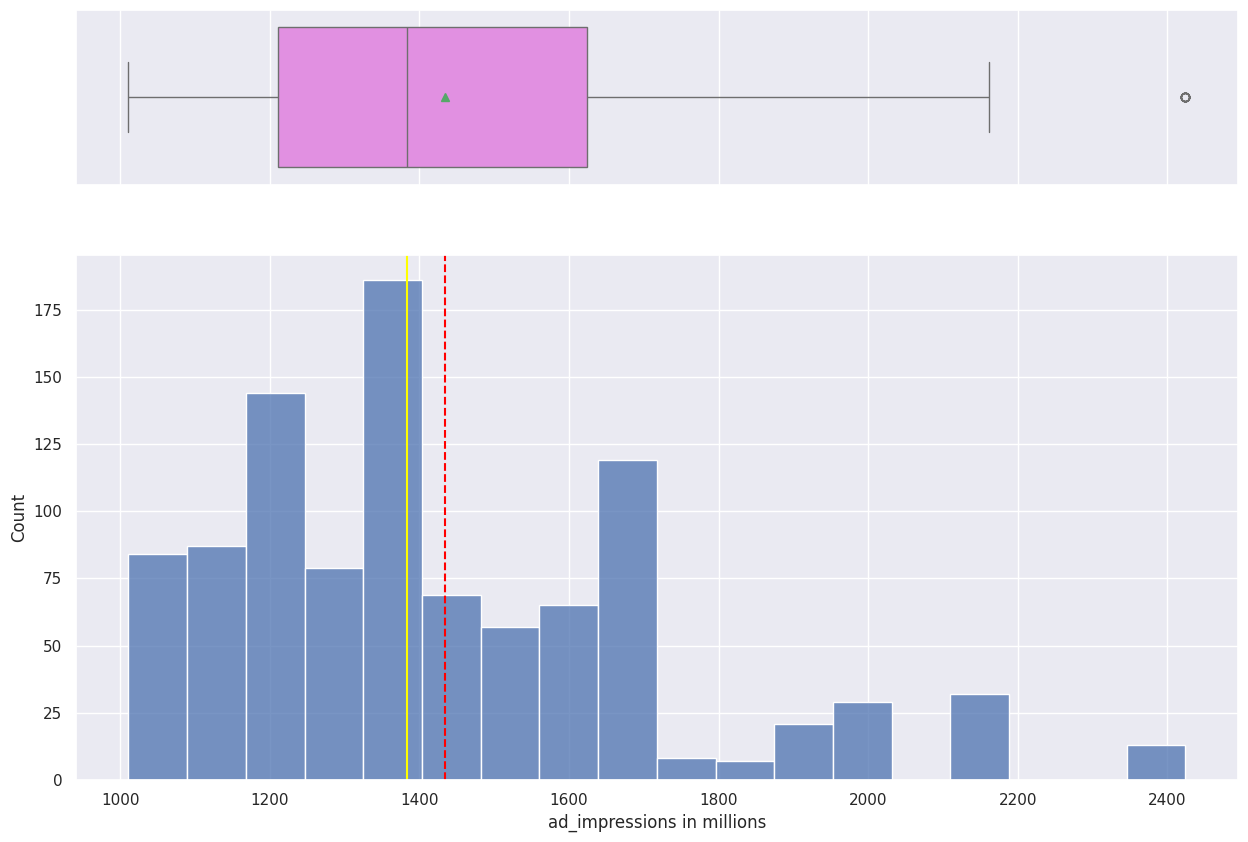

In [ ]:
histogram_boxplot(data, "ad_impressions")

In [ ]:
data['ad_impressions'].loc[data['ad_impressions'] > 2200]

106    2424.2
182    2424.2
217    2424.2
228    2424.2
272    2424.2
303    2424.2
333    2424.2
592    2424.2
615    2424.2
667    2424.2
864    2424.2
944    2424.2
984    2424.2
Name: ad_impressions, dtype: float64

The ad impression plot is normally distributed.

##### Observation on View content

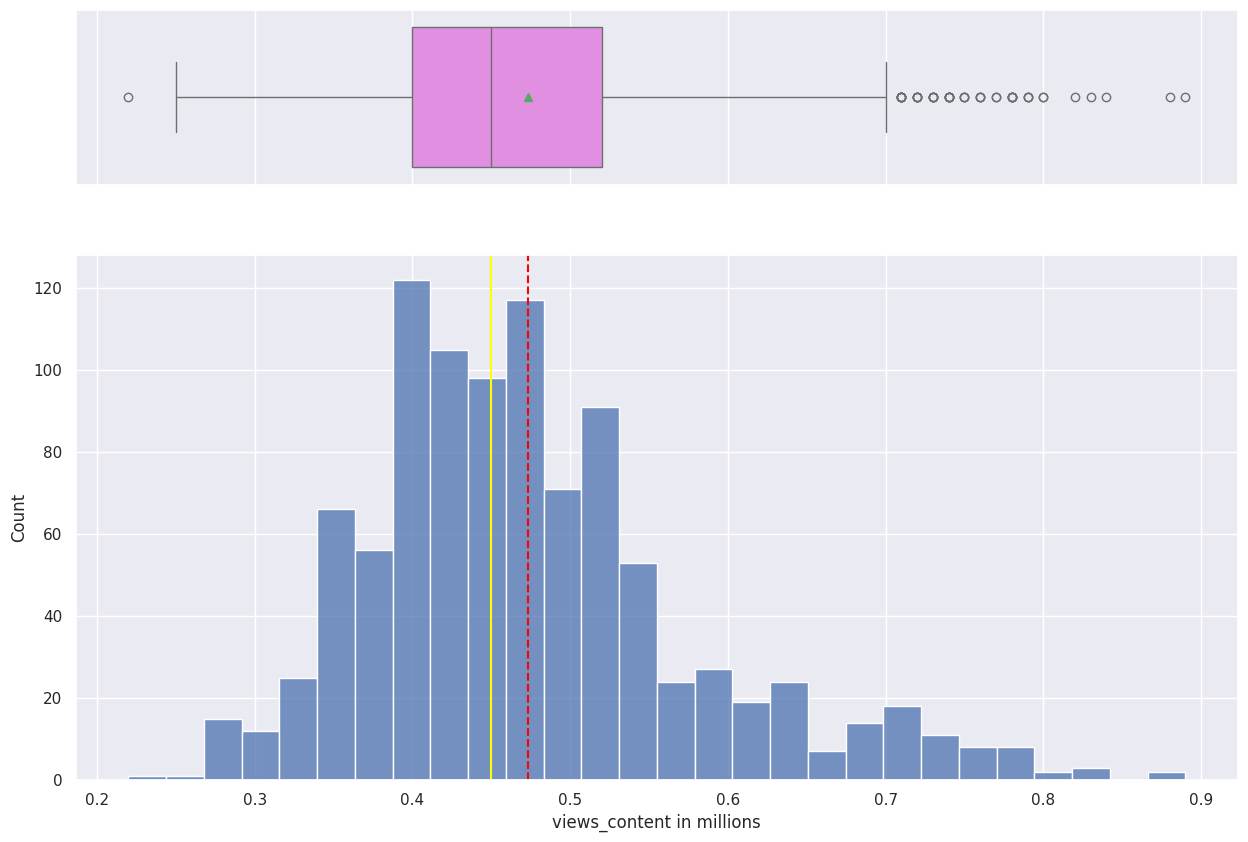

In [ ]:
histogram_boxplot(data, "views_content")

In [ ]:
data['views_content'].loc[data['views_content']> 0.7].unique()

array([0.74, 0.78, 0.75, 0.79, 0.77, 0.72, 0.84, 0.71, 0.88, 0.76, 0.73,
       0.8 , 0.82, 0.83, 0.89])

In [ ]:
data['views_content'].loc[data['views_content']< 0.25].unique()

array([0.22])

The distribution is right-skewed.

##### Observation on View trailer

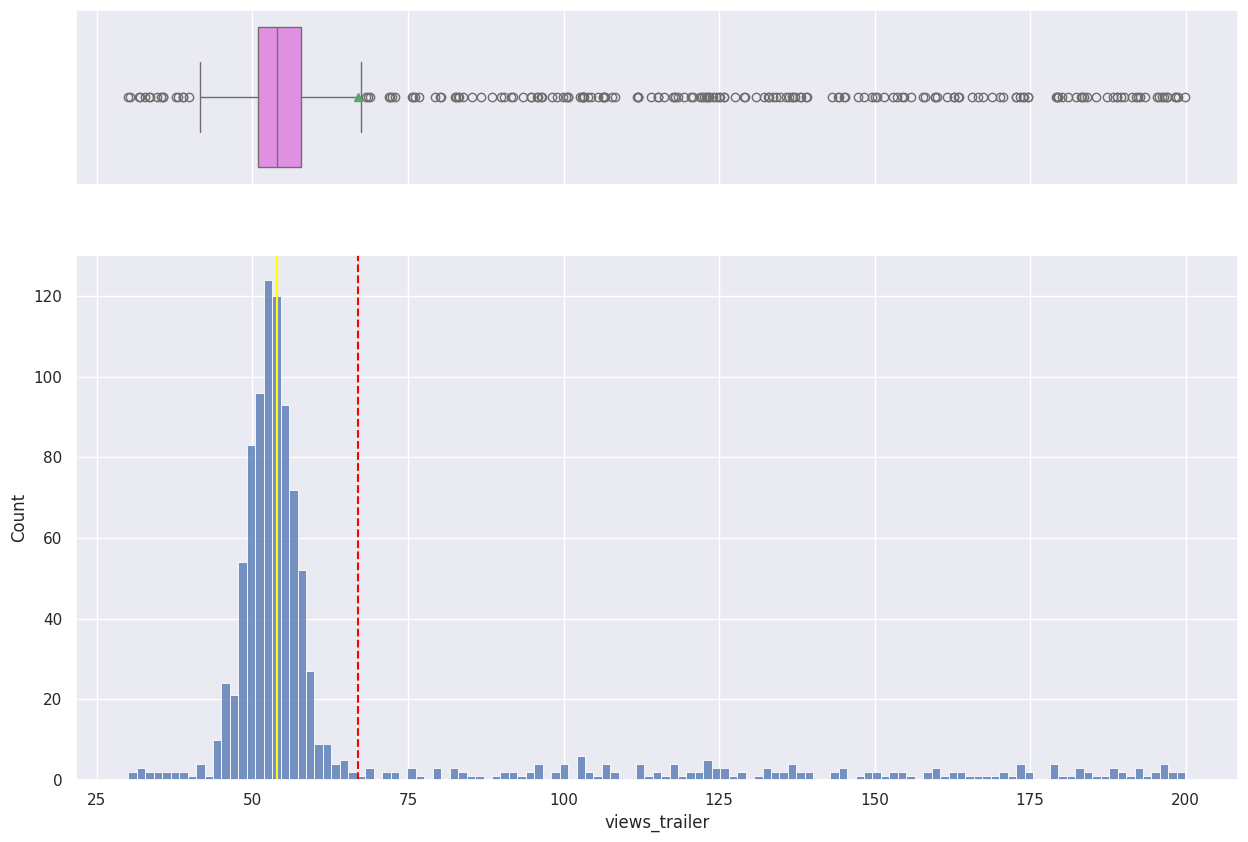

In [ ]:
histogram_boxplot(data, "views_trailer")

The distribution is right-skewed.

#### Categorical variable

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['major_sports_event', 'genre', 'dayofweek', 'season']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

major_sports_event
0    600
1    400
Name: count, dtype: int64
--------------------------------------------------
genre
Others      255
Comedy      114
Thriller    113
Drama       109
Romance     105
Sci-Fi      102
Horror      101
Action      101
Name: count, dtype: int64
--------------------------------------------------
dayofweek
Friday       369
Wednesday    332
Thursday      97
Saturday      88
Sunday        67
Monday        24
Tuesday       23
Name: count, dtype: int64
--------------------------------------------------
season
Winter    257
Fall      252
Spring    247
Summer    244
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
# function to create labeled barplots for categorical variable

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##### Observation on Major sports event

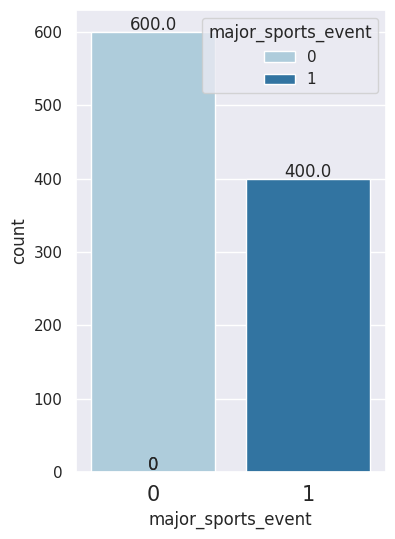

In [ ]:
labeled_barplot(data, "major_sports_event")

##### Observation on Genre

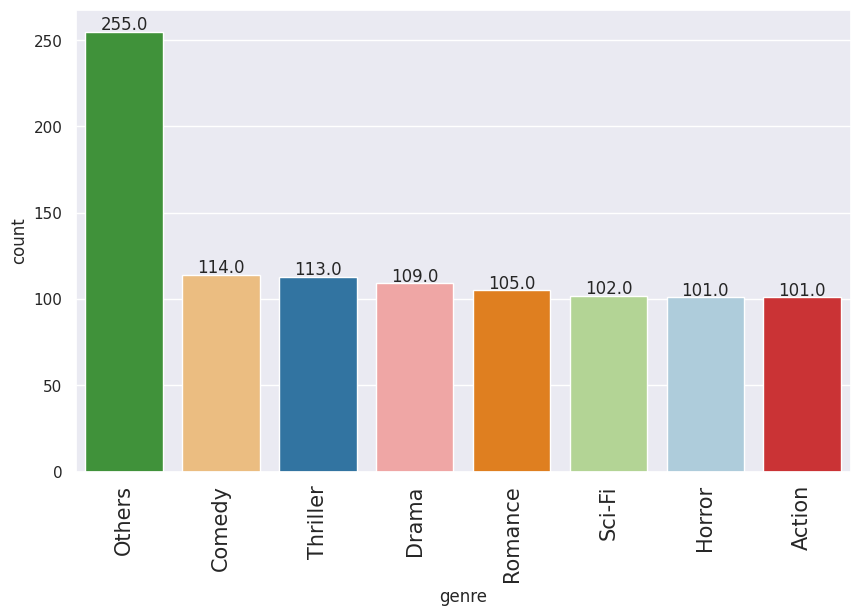

In [ ]:
labeled_barplot(data, "genre")

##### Observation on Day of week

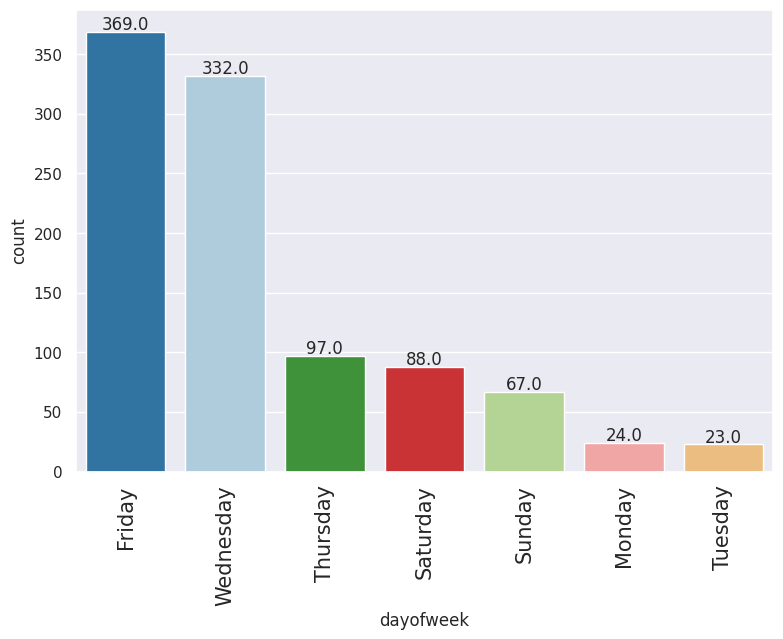

In [ ]:
labeled_barplot(data, "dayofweek")

##### Observation on Season

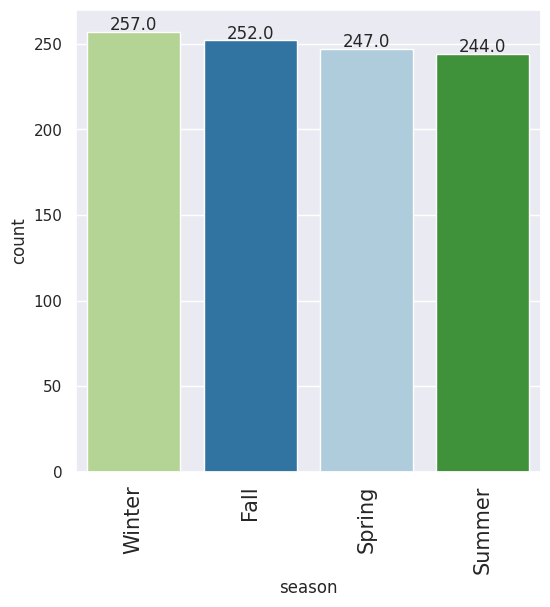

In [ ]:
labeled_barplot(data, "season")

### Bivariate Analysis

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables.
- Bivariate Analysis of two Categorical Variables.
- Bivariate Analysis of one Numerical Variable and one Categorical Variable.

#### Bivariate Analysis of two Numerical Variables

##### Correlation by Heatmap

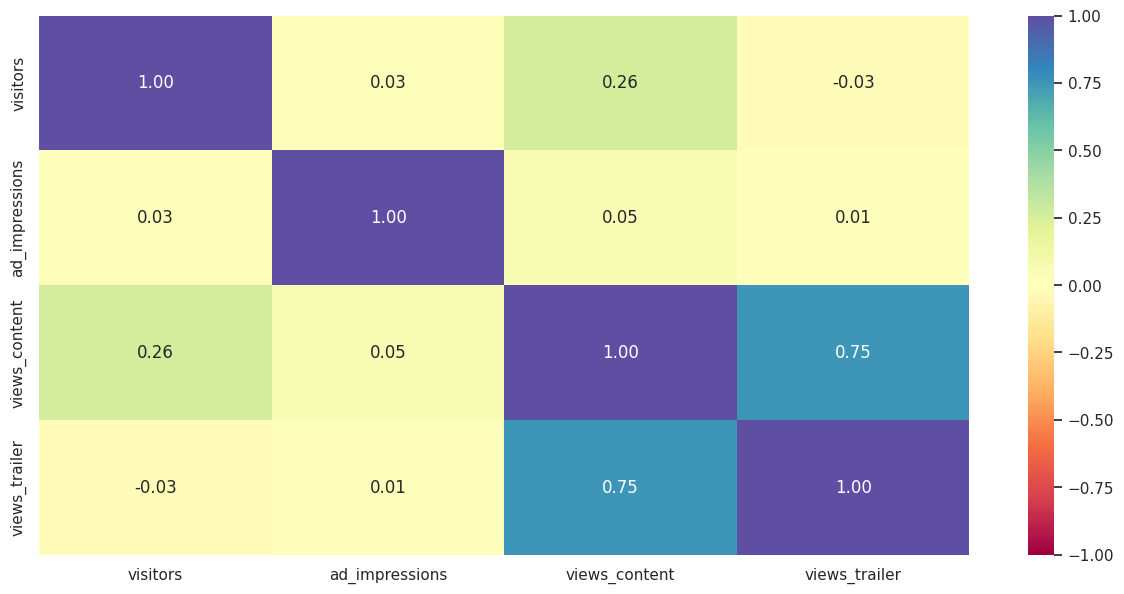

In [ ]:
# Check for correlation among numerical variables
num_var = ['visitors','ad_impressions','views_content','views_trailer']

corr = data[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

##### Bivariate Scatter Plots

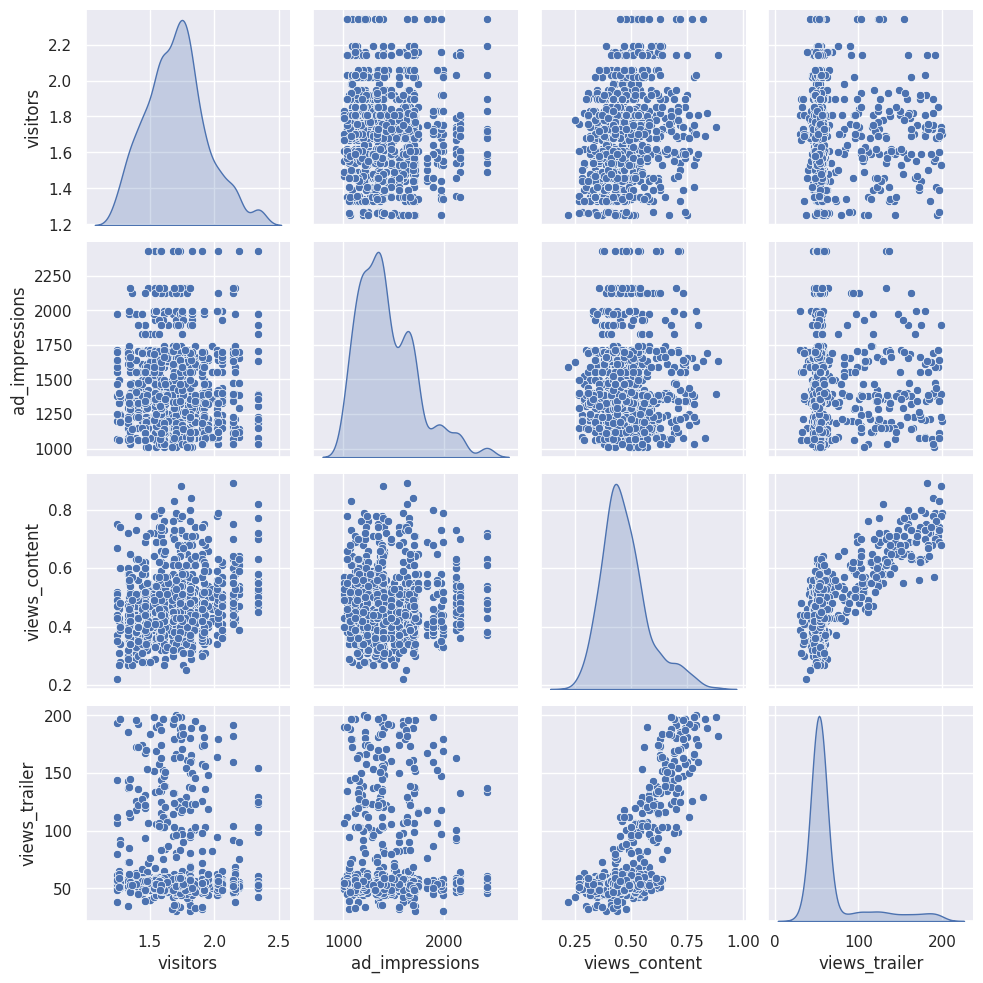

In [ ]:
sns.pairplot(data=data[num_var], diag_kind="kde")
plt.show()

<Axes: xlabel='views_content', ylabel='views_trailer'>

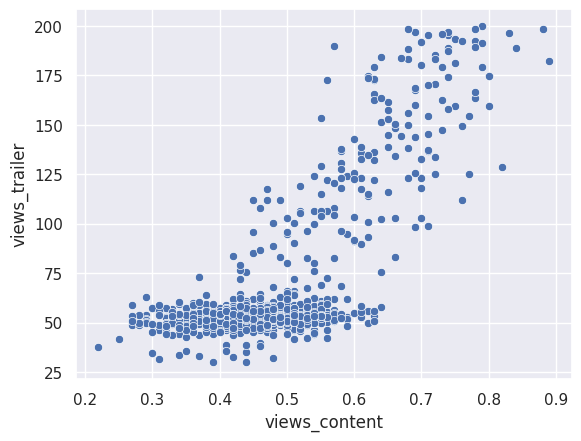

In [ ]:
sns.scatterplot(data, x = 'views_content', y = 'views_trailer')

#### Bivariate Analysis of two Categorical Variables

##### Genre Vs Season

<Axes: xlabel='genre', ylabel='count'>

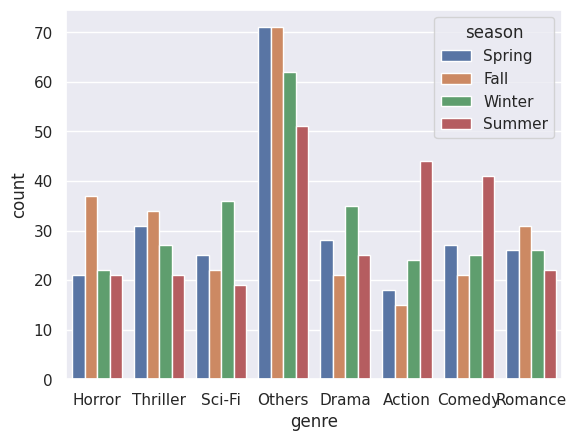

In [ ]:
sns.countplot(x="genre", hue="season", data=data)

In [ ]:
pd.crosstab(data.genre, data.season, margins=True).style.background_gradient(cmap="Greens_r")

season,Fall,Spring,Summer,Winter,All
genre,,,,,
Action,15,18,44,24,101
Comedy,21,27,41,25,114
Drama,21,28,25,35,109
Horror,37,21,21,22,101
Others,71,71,51,62,255
Romance,31,26,22,26,105
Sci-Fi,22,25,19,36,102
Thriller,34,31,21,27,113
All,252,247,244,257,1000


##### Genre Vs Day of week

<Axes: xlabel='genre', ylabel='count'>

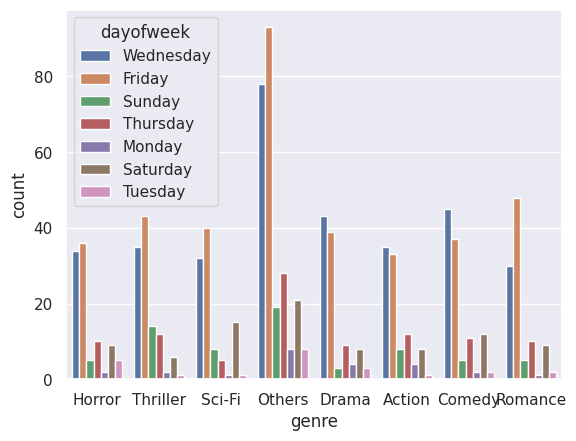

In [ ]:
sns.countplot(x="genre", hue="dayofweek", data=data)

In [ ]:
pd.crosstab(data.genre, data.dayofweek, margins=True).style.background_gradient(cmap="Blues")

dayofweek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
genre,,,,,,,,
Action,33,4,8,8,12,1,35,101
Comedy,37,2,12,5,11,2,45,114
Drama,39,4,8,3,9,3,43,109
Horror,36,2,9,5,10,5,34,101
Others,93,8,21,19,28,8,78,255
Romance,48,1,9,5,10,2,30,105
Sci-Fi,40,1,15,8,5,1,32,102
Thriller,43,2,6,14,12,1,35,113
All,369,24,88,67,97,23,332,1000


##### Genre Vs Major sports event

<Axes: xlabel='genre', ylabel='count'>

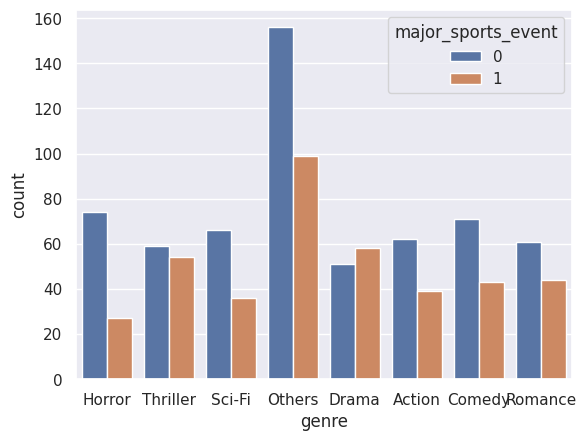

In [ ]:
sns.countplot(x="genre", hue="major_sports_event", data=data)

In [ ]:
pd.crosstab(data.genre, data.major_sports_event, margins=True).style.background_gradient(cmap="PuOr")

major_sports_event,0,1,All
genre,,,
Action,62,39,101
Comedy,71,43,114
Drama,51,58,109
Horror,74,27,101
Others,156,99,255
Romance,61,44,105
Sci-Fi,66,36,102
Thriller,59,54,113
All,600,400,1000


#### Bivariate Analysis of one Numerical Variable and one Categorical Variable

##### Genre Vs numerical colums

In [ ]:
data_pivot = data.pivot_table(index='genre',
                              aggfunc={'visitors': ['min', 'max', 'mean'],
                                       'ad_impressions': ['min', 'max', 'mean'],
                                       'views_content': ['min', 'max', 'mean'],
                                       'views_trailer': ['min', 'max', 'mean']})

# Transpose the pivot table
transposed_pivot = data_pivot.transpose()

# Apply styling
styled_transposed_pivot = transposed_pivot.style.highlight_max(color='green', axis=1)

# Display the styled transposed pivot table
styled_transposed_pivot

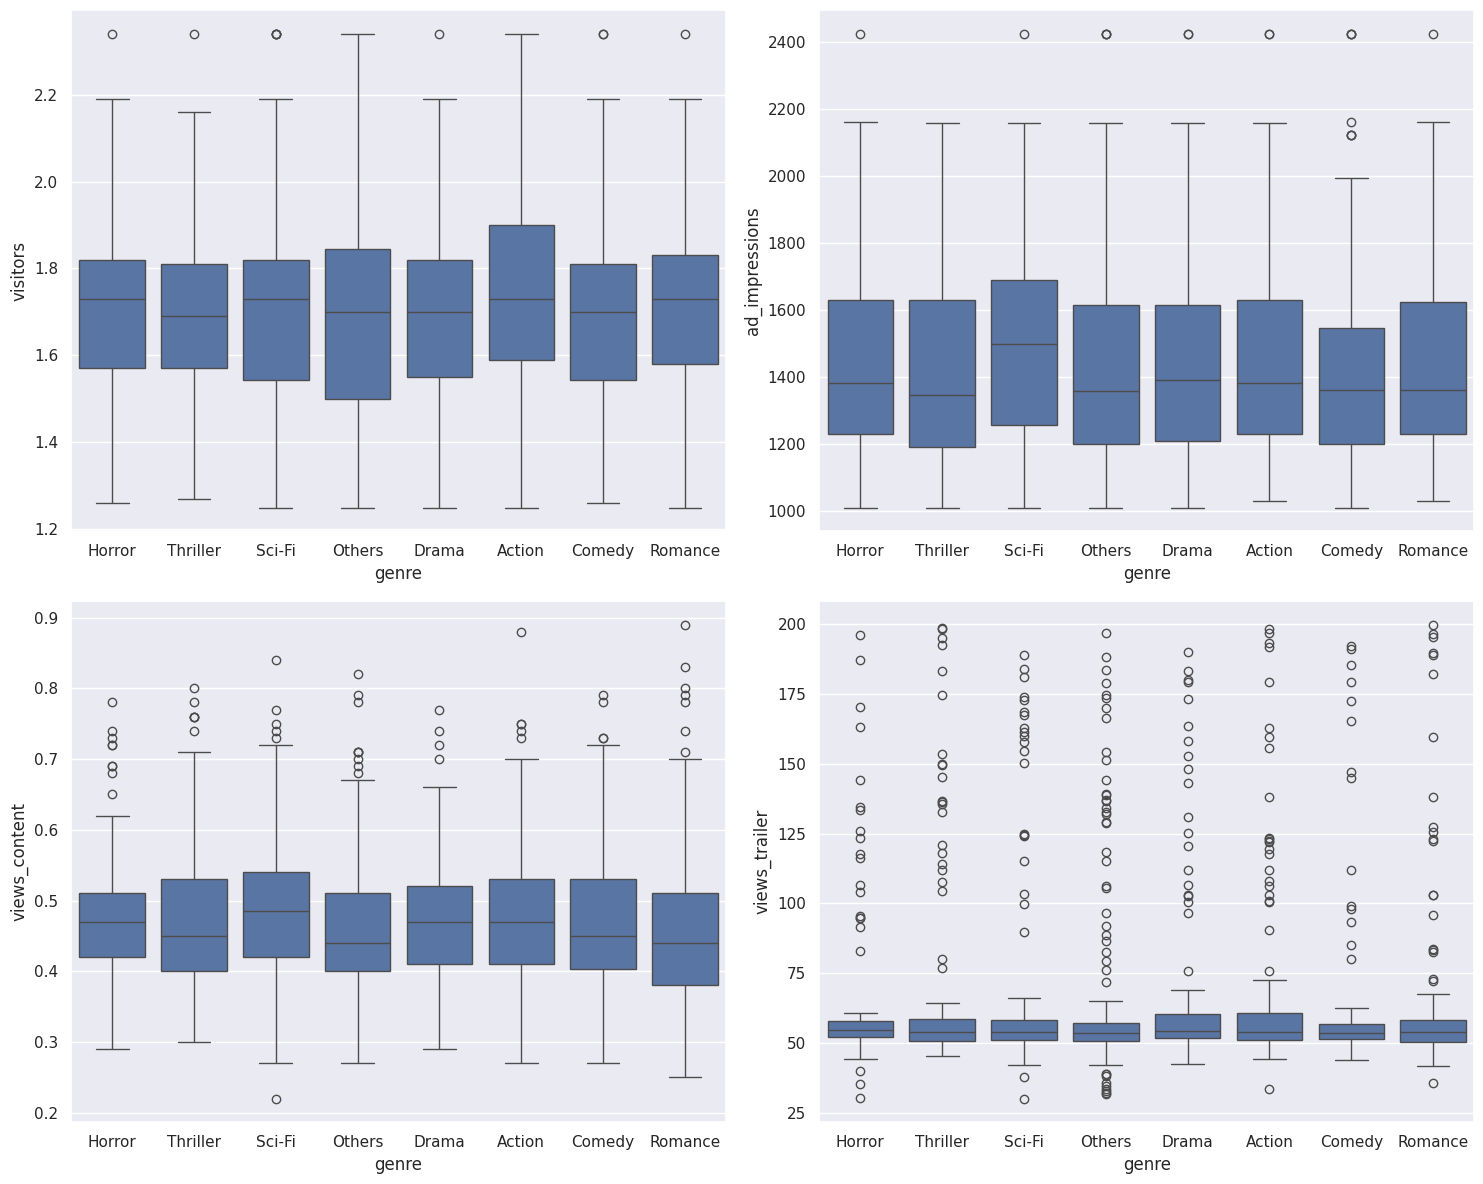

In [ ]:
num_col = ['visitors','ad_impressions','views_content','views_trailer']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=variable, x="genre", data=data)
    plt.tight_layout()

plt.show()

##### Major sports event Vs numerical columns

In [ ]:
 data_pivot = data.pivot_table(index='major_sports_event',
                              aggfunc={'visitors': ['min', 'max', 'mean'],
                                       'ad_impressions': ['min', 'max', 'mean'],
                                       'views_content': ['min', 'max', 'mean'],
                                       'views_trailer': ['min', 'max', 'mean']})

# Transpose the pivot table
transposed_pivot = data_pivot.transpose()

# Apply styling
styled_transposed_pivot = transposed_pivot.style.highlight_max(color='green', axis=1)

# Display the styled transposed pivot table
styled_transposed_pivot

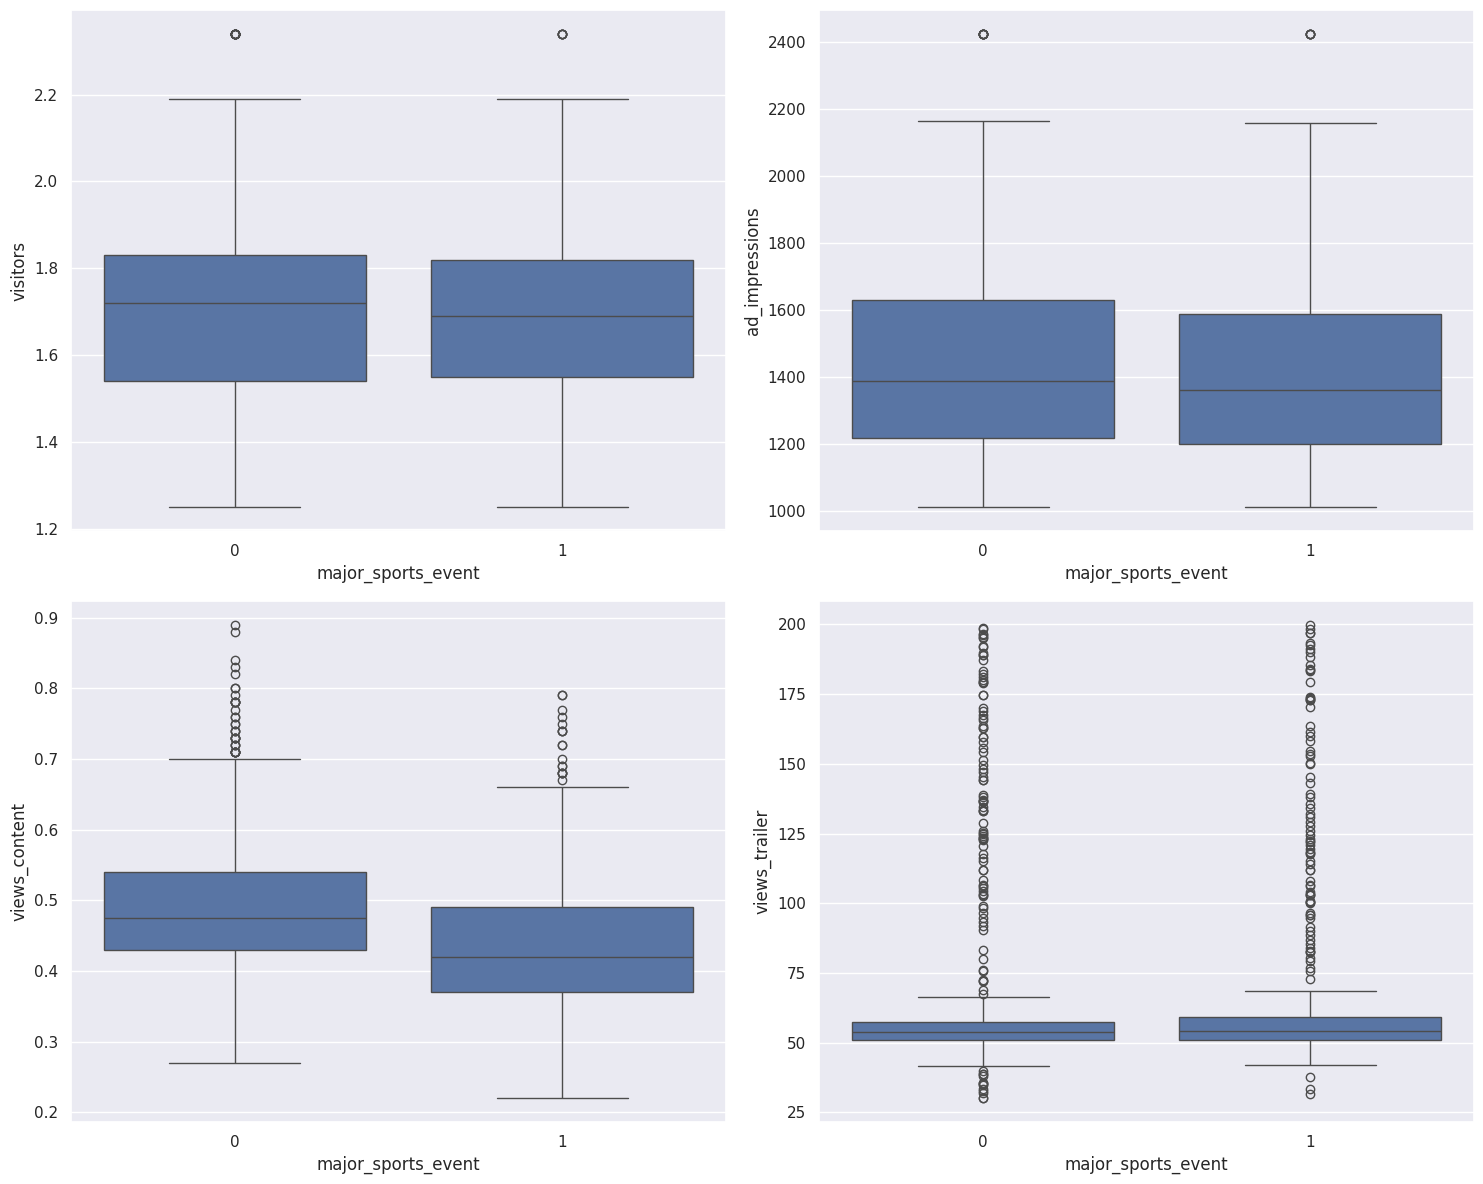

In [ ]:
num_col = ['visitors','ad_impressions','views_content','views_trailer']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=variable, x="major_sports_event", data=data)
    plt.tight_layout()

plt.show()

##### Day of week Vs numerical colums

In [ ]:
 data_pivot = data.pivot_table(index='dayofweek',
                              aggfunc={'visitors': ['min', 'max', 'mean'],
                                       'ad_impressions': ['min', 'max', 'mean'],
                                       'views_content': ['min', 'max', 'mean'],
                                       'views_trailer': ['min', 'max', 'mean']})

# Transpose the pivot table
transposed_pivot = data_pivot.transpose()

# Apply styling
styled_transposed_pivot = transposed_pivot.style.highlight_max(color='green', axis=1)

# Display the styled transposed pivot table
styled_transposed_pivot

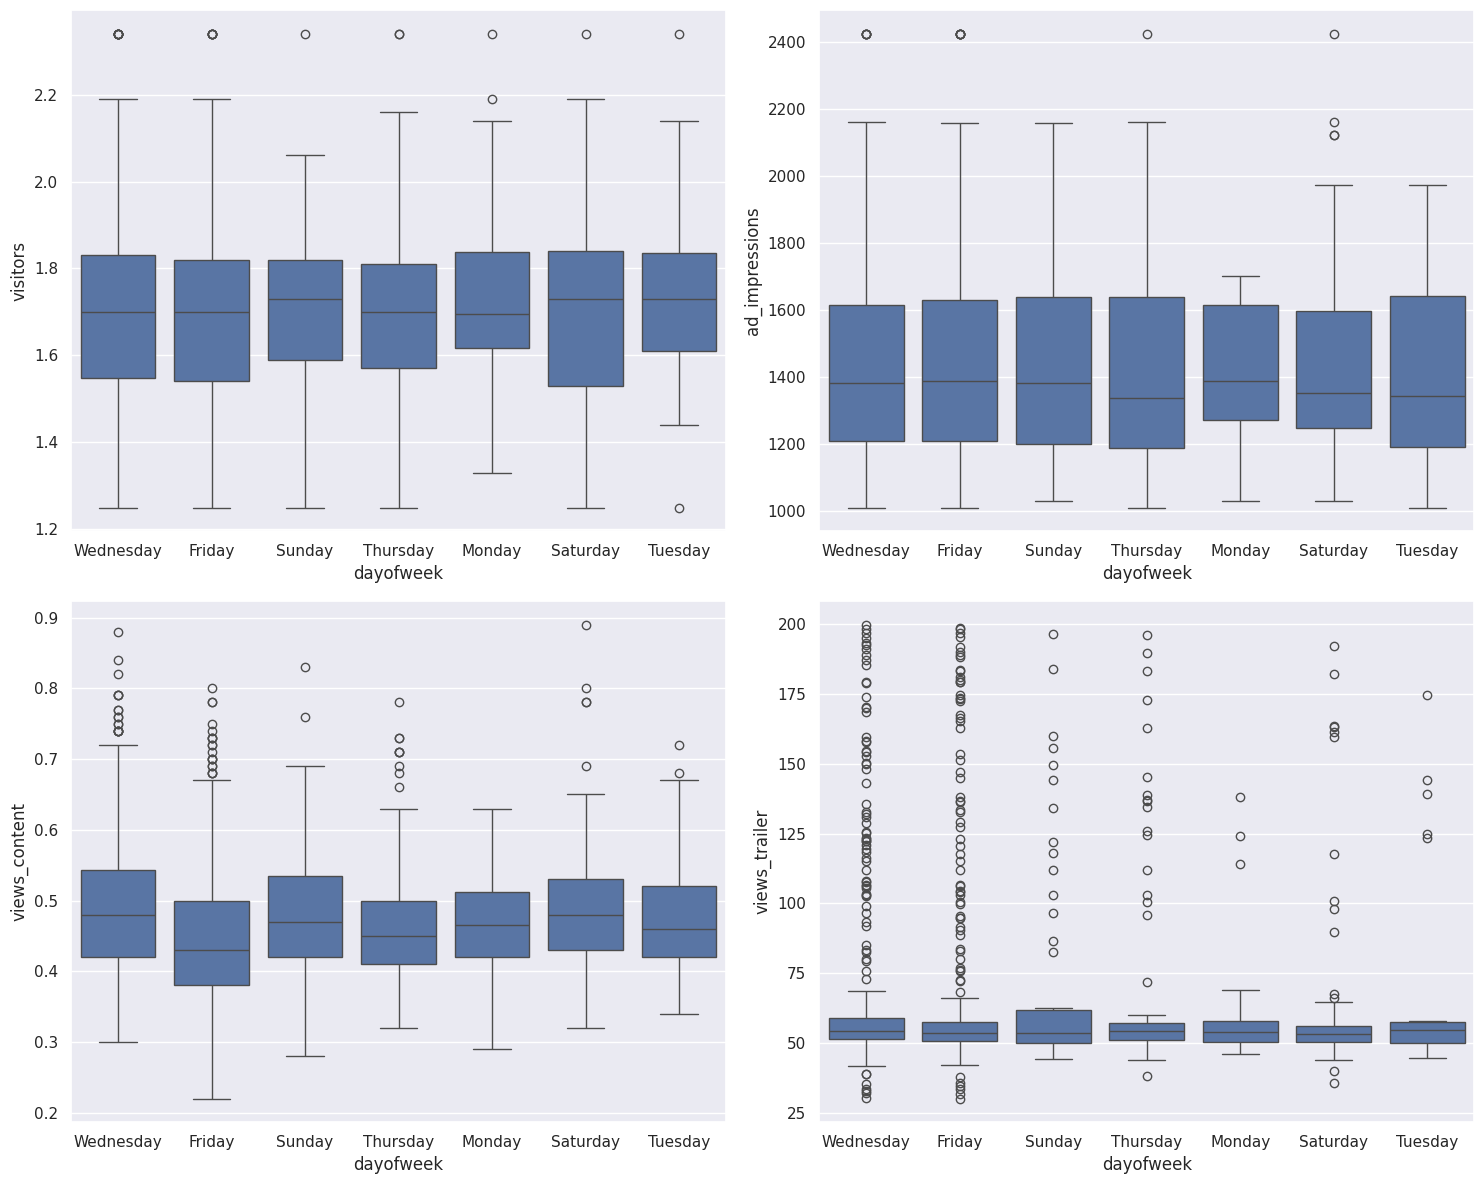

In [ ]:
num_col = ['visitors','ad_impressions','views_content','views_trailer']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=variable, x="dayofweek", data=data)
    plt.tight_layout()

plt.show()

##### Season Vs numerical colums

In [ ]:
 data_pivot = data.pivot_table(index='season',
                              aggfunc={'visitors': ['min', 'max', 'mean'],
                                       'ad_impressions': ['min', 'max', 'mean'],
                                       'views_content': ['min', 'max', 'mean'],
                                       'views_trailer': ['min', 'max', 'mean']})

# Transpose the pivot table
transposed_pivot = data_pivot.transpose()

# Apply styling
styled_transposed_pivot = transposed_pivot.style.highlight_max(color='green', axis=1)

# Display the styled transposed pivot table
styled_transposed_pivot

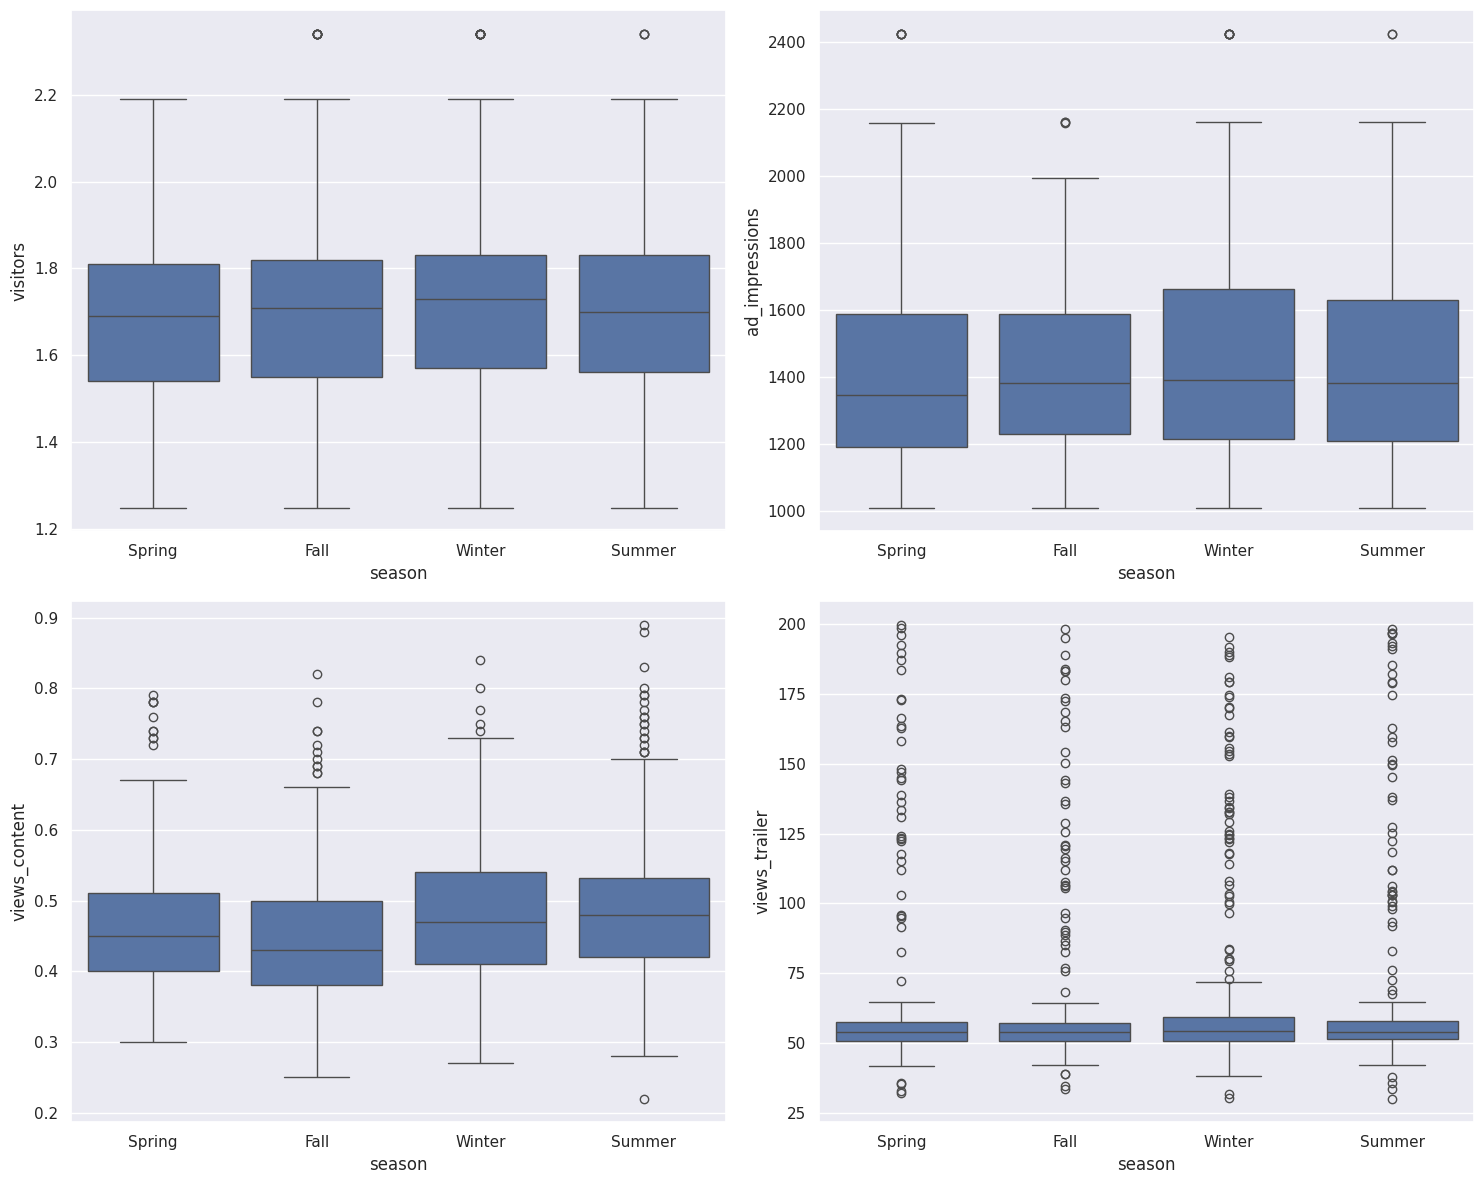

In [ ]:
num_col = ['visitors','ad_impressions','views_content','views_trailer']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_col):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=variable, x='season', data=data);
    plt.tight_layout()

plt.show()

### Multivariate Analysis

#### Genre Vs Major sports Event Vs View trailer

<Figure size 1500x500 with 0 Axes>

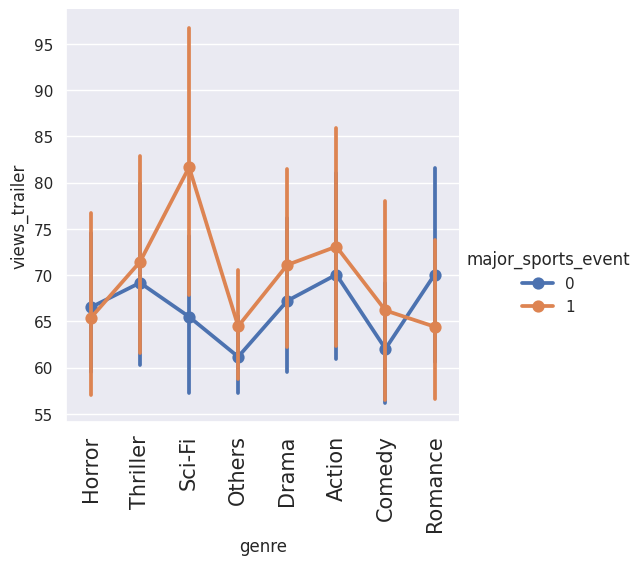

In [ ]:
plt.figure(figsize=(15,5))
sns.catplot(data=data, x="genre", y="views_trailer", hue="major_sports_event", kind='point')
plt.xticks(rotation=90, fontsize=15)
plt.show()

#### Genre Vs Day of week Vs View content

<Axes: xlabel='dayofweek', ylabel='views_content'>

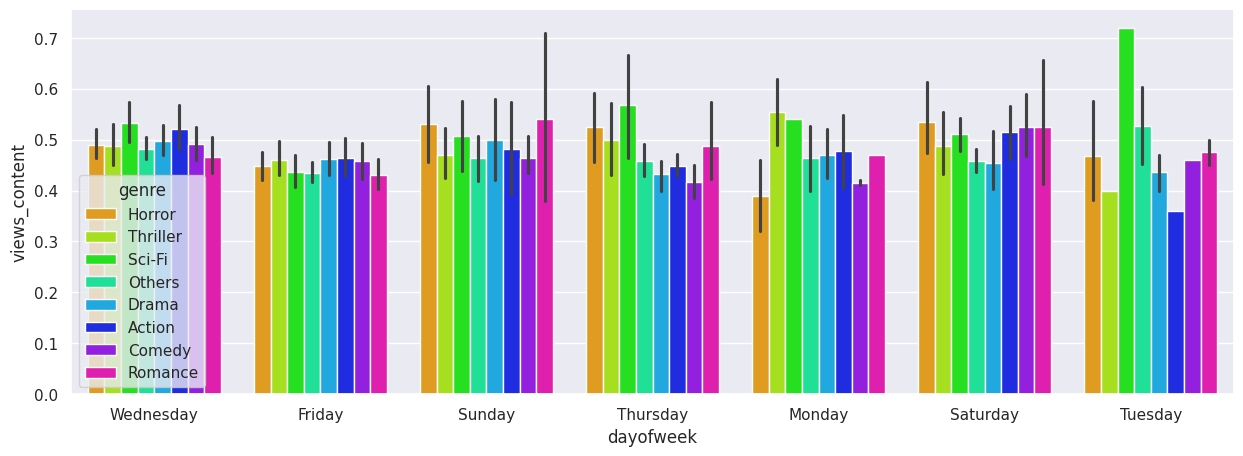

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="dayofweek", y="views_content", hue="genre", palette="hsv")

#### Genre Vs Season Vs Visitors

<Axes: xlabel='season', ylabel='visitors'>

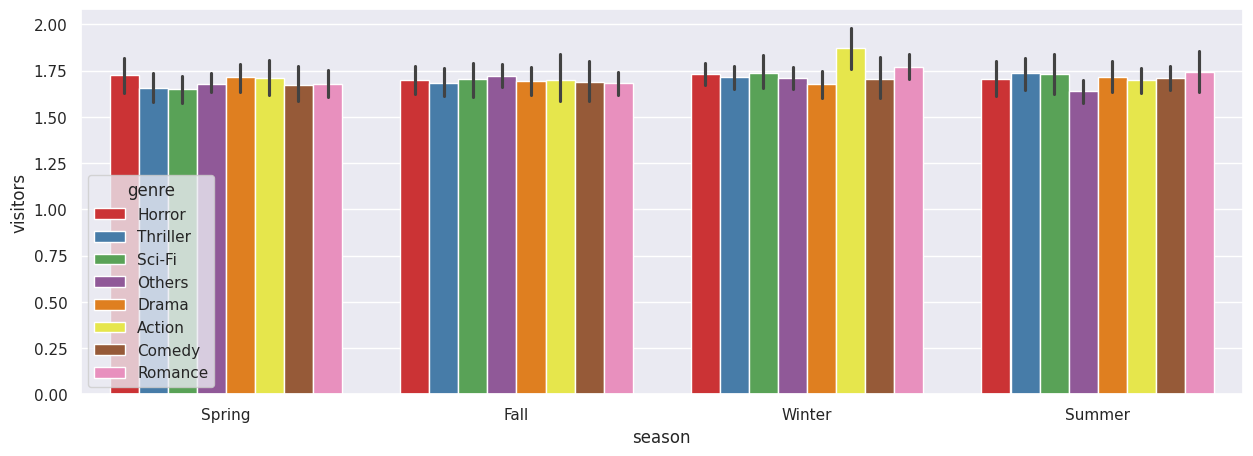

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="season", y="visitors", hue="genre", palette="Set1")

#### Genre Vs Season Vs View content

<Axes: xlabel='genre', ylabel='views_content'>

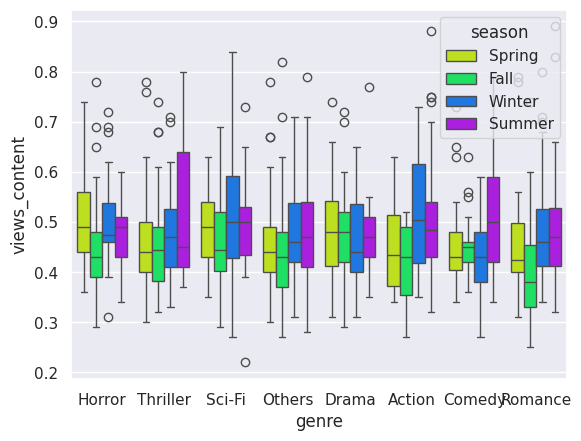

In [ ]:
sns.boxplot(data=data, x="genre", y="views_content", hue="season", palette="hsv")

In [ ]:
 season_summer = data.loc[data['season'] == 'Summer']
 data_pivot = season_summer.pivot_table(index='genre',
                              aggfunc={'views_content': ['min', 'max', 'mean']})

# Transpose the pivot table
transposed_pivot = data_pivot.transpose()

# Apply styling
styled_transposed_pivot = transposed_pivot.style.highlight_max(color='green', axis=1)

# Display the styled transposed pivot table
styled_transposed_pivot

<ipython-input-83-060a07261635>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=data, col="season", y="views_content", x="genre", kind='point', palette='Set1');


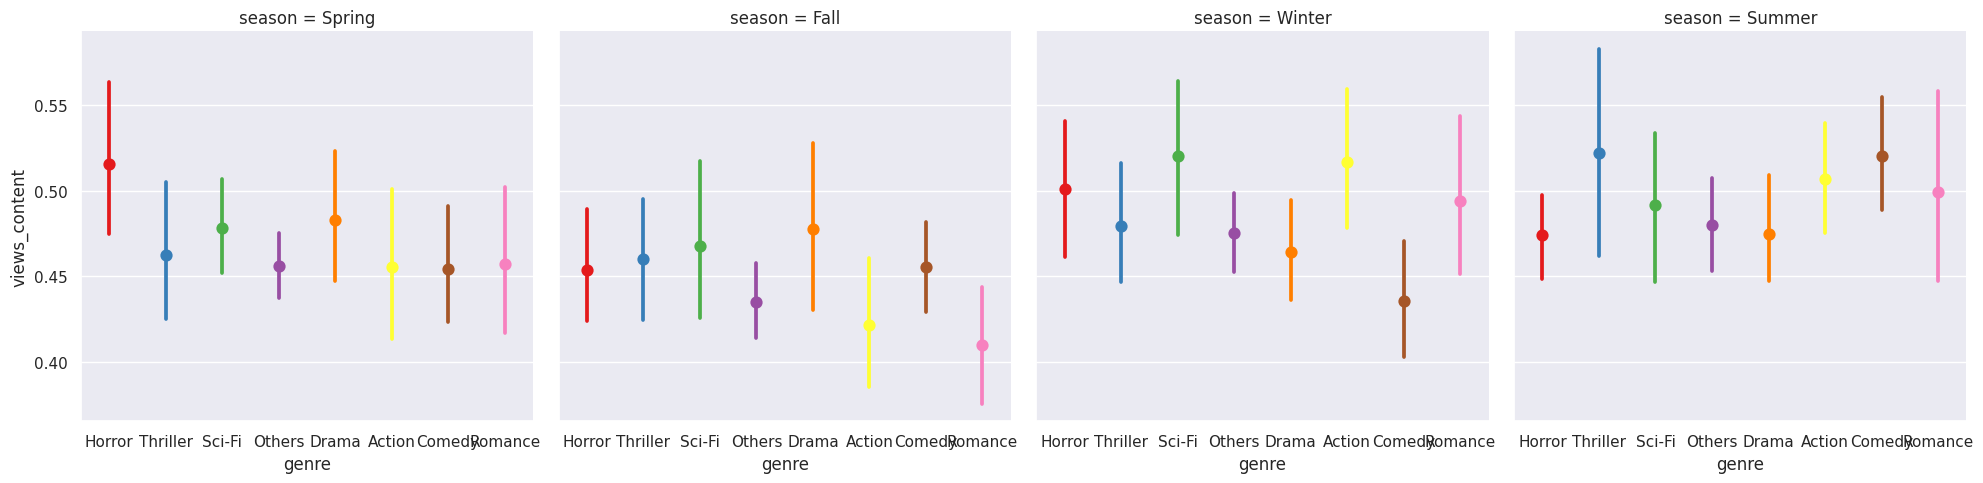

In [ ]:
sns.catplot(data=data, col="season", y="views_content", x="genre", kind='point', palette='Set1');

In [ ]:
df.groupby(["season", "genre"])["views_content"].mean()

season  genre   
Fall    Action      0.421333
        Comedy      0.455238
        Drama       0.477619
        Horror      0.453784
        Others      0.435070
        Romance     0.410000
        Sci-Fi      0.467727
        Thriller    0.460000
Spring  Action      0.455556
        Comedy      0.454444
        Drama       0.482857
        Horror      0.515714
        Others      0.456197
        Romance     0.457308
        Sci-Fi      0.478000
        Thriller    0.462581
Summer  Action      0.506818
        Comedy      0.520488
        Drama       0.474400
        Horror      0.473810
        Others      0.480196
        Romance     0.499091
        Sci-Fi      0.491579
        Thriller    0.521905
Winter  Action      0.516667
        Comedy      0.435600
        Drama       0.464286
        Horror      0.500909
        Others      0.475323
        Romance     0.494231
        Sci-Fi      0.520278
        Thriller    0.479630
Name: views_content, dtype: float64

### Insight from EDA

-	The numbers of views on content increase with an increase in its views on trailer, hence the company can add more trailers in their platform which can attract the visitors to watch its content.
-	Views on content is high during summer season so we can release more contents during this season to increase the number of views.
-	During summer season thriller genre has higher view, on winter sci-fi has higher views, on spring horror has higher views and on fall drama has higher views.
-	Service providers can release the contents on Saturday as people prefer watching content that particular day of the week the most in the OTT platform.
-	Sci-fi genre has more views on contents. So, this genre is the easy target among the users.


## Data Preprocessing

### Missing Value Treatment

In [ ]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

There is no missing values in the data set.

### Duplicate value check

In [ ]:
df.duplicated().sum()

0

There is no duplicate row in the data set.

### Feature Engineering

In [ ]:
df['major_sports_event'] = df['major_sports_event'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   visitors            1000 non-null   float64 
 1   ad_impressions      1000 non-null   float64 
 2   major_sports_event  1000 non-null   category
 3   genre               1000 non-null   object  
 4   dayofweek           1000 non-null   object  
 5   season              1000 non-null   object  
 6   views_trailer       1000 non-null   float64 
 7   views_content       1000 non-null   float64 
dtypes: category(1), float64(4), object(3)
memory usage: 55.9+ KB


### Outlier detection

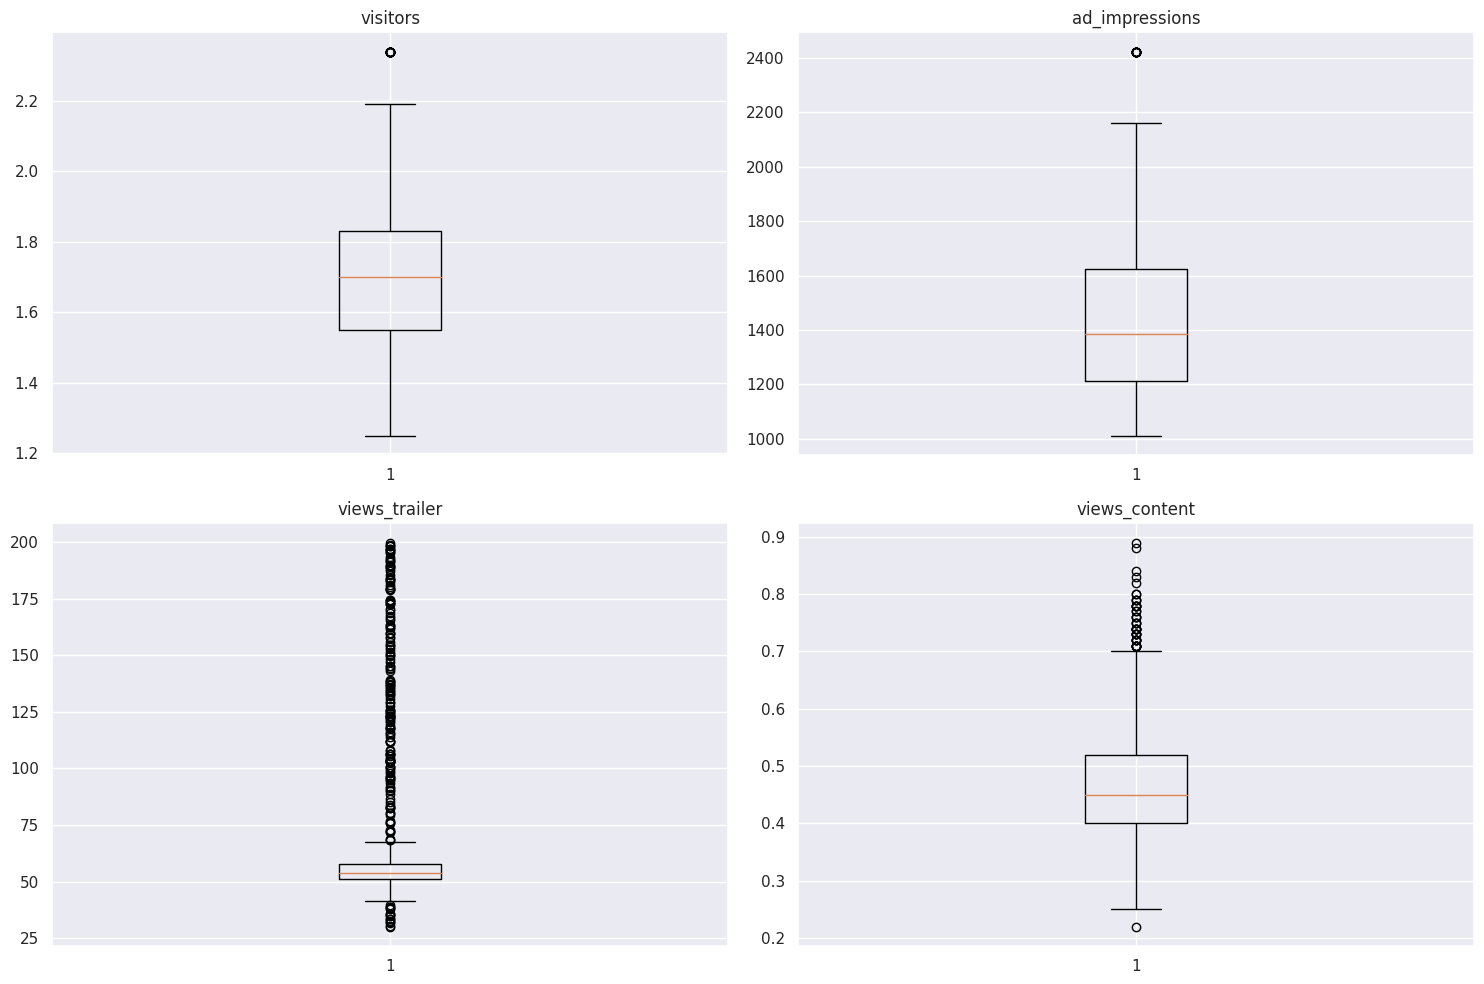

In [ ]:
# outlier detection using boxplot
# selecting the numerical columns of the data
num_cols = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values

### Data Preparation for Modelling

- We want to predict the views of content
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
#we want to predict views_content
X = df.drop(["views_content"], axis=1)
y = df["views_content"]

print(X.head())
print(y.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,1,52.69,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,1,48.74,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,1,49.81,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,0,55.83,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
X.keys()

Index(['const', 'visitors', 'ad_impressions', 'major_sports_event',
       'views_trailer', 'genre_Comedy', 'genre_Drama', 'genre_Horror',
       'genre_Others', 'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller',
       'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [ ]:
# converting the input attributes into float type for modelling
X = X.astype(float)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in the train set is: ", x_train.shape[0])
print("Number of rows in the test set is: ", x_test.shape[0])

Number of rows in the train set is:  700
Number of rows in the test set is:  300


## Model Building - Linear Regression

Let's build the linear regression model

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          1.32e-215
Time:                        05:32:02   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

### Interpreting the Regression Results:

#### Interpretation of R-squared
It reflects the fit of the model.

- R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- In our case, the value for R-squared is **0.792** and Adj.R-squared is **0.785**, which is good.
- The R-squared value tells us that our model can explain 79% of the variance in the training set.

#### Interpretation of Coefficients

* The coefficients tell us how one unit change in X can affect y.

* The sign of the coefficient indicates if the relationship is positive or negative.
* **Const coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **0.0602**

#### Interpretation of p-values (P > |t|)

* For each predictor variable there is a null hypothesis and alternate hypothesis.


    Null hypothesis : Predictor variable is not significant
    Alternate hypothesis : Predictor variable is significant


* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

* However, due to the presence of multicollinearity in our data, the p-values will also change.

* We need to ensure that there is no multicollinearity in order to interpret the p-values.

### Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


**Observations**

- The training $R^2$ is 0.79, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict view counts within a mean error of 0.04 on the test data

- MAPE of 9.03 on the test data means that we are able to predict within 9.03% of the view counts

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Test for Multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,major_sports_event,1.065689
4,views_trailer,1.023551
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)
* Here, no multicollinearity is present among the variables as all VIF values are below 5.

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'major_sports_event', 'views_trailer', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [ ]:
x_train1 = x_train[selected_features]
x_test1 = x_test[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train1).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 07 Jul 2024   Prob (F-statistic):          7.03e-224
Time:                        05:35:14   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0747    

### Model Performance Check

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train1, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test1, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train1* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.785, i.e., our model is able to explain ~79% of the variance
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Test for Linearity and Independence

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.445434,-0.045434
716,0.70,0.677403,0.022597
640,0.42,0.433999,-0.013999
804,0.55,0.562030,-0.012030
737,0.59,0.547786,0.042214


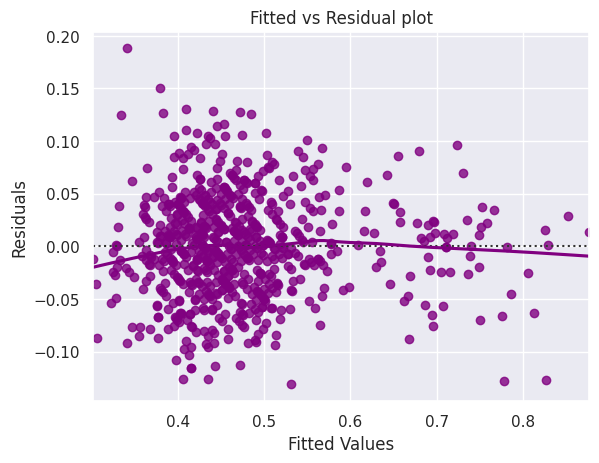

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### Test for Normality

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

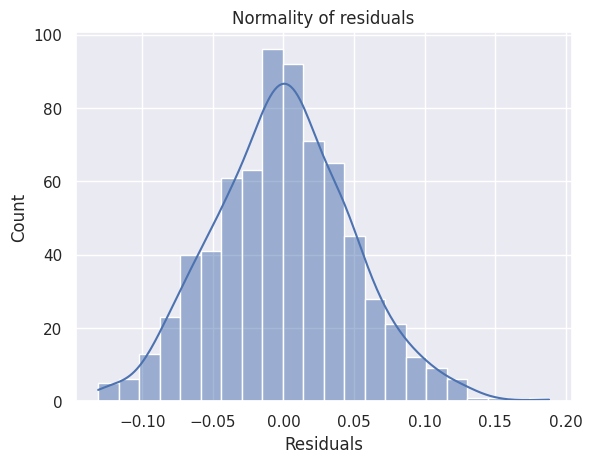

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

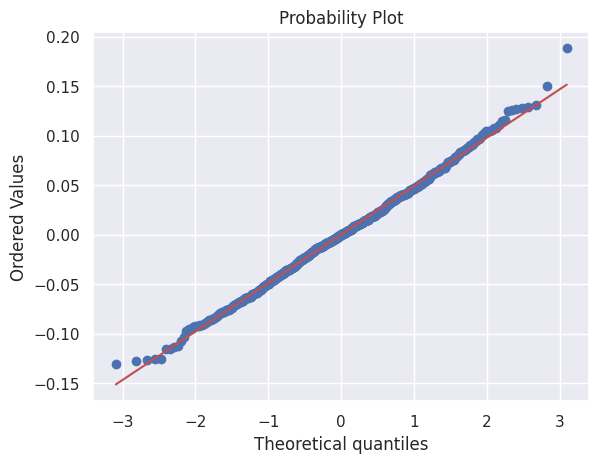

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9973143339157104, pvalue=0.3104695975780487)

- Since p-value > 0.05, the residuals are normal as per the Shapiro-Wilk test.
- **So, the assumption is satisfied.**

### Test for Homoscedasticity

* **Homoscedasticity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedasticity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train1)
lzip(name, test)

[('F statistic', 1.1313612904200752), ('p-value', 0.12853551819087372)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test1)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [ ]:
x_train_final = x_train1.copy()
x_test_final = x_test1.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          7.03e-224
Time:                        06:36:17   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0747 

Evaluating the model on different performance metrics

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


* The model is able to explain ~79% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 9.2% of the views

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights & Recommendations

- The model is able to explain ~79% of the variation in the data and within 9.2% of views on content on the test data, which is good. This indicates that the model is good for prediction as well as inference purposes
- If the number of visitors increases by one unit, then views on content increases by 0.1291 units, all other variables held constant
- If the number of views on trailer increases by one unit, then its rating increases by 0.0023 units, all other variables held constant
-As the views on content increase with an increase in the number of people visiting the platform, the company can improve its marketing activities to promote their content
- As the views on content increase with an increase in its views on trailer, the company can look to add more trailers in their portal which can attract the visitors to watch its content.
- Service providers can release the contents on saturday as people prefer watching content that particular day of the week the most in the OTT platform.
- Service providers can release the trailers and ad on saturday to attract the people to watch the content and increase its views.
- Views on content is high during summer season so we can release more contents during this season.
-Service providers can gather data about their users like age, gender, geographical location, occupation, etc. to better understand the different genre users like.